## Programming Assignment - 2: Convolutional Neural Networks

## Loading the data

In [1]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import packages
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
mnist_train = torchvision.datasets.MNIST(root = 'MNIST', download = True, transform = transforms.ToTensor())
mnist_data_test = torchvision.datasets.MNIST(root = 'MNIST', train = False, download = True, transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



In [ ]:
train_indices, val_indices, _, _ = train_test_split(
    range(len(mnist_train)),
    mnist_train.targets,
    stratify = mnist_train.targets,
    test_size = 0.2,
    random_state = 42
)

# generate subset based on indices
mnist_data_train = Subset(mnist_train, train_indices)
mnist_data_val = Subset(mnist_train, val_indices)

In [ ]:
# Parameters

BATCH_SIZE = 64
CLASSES = 10

In [ ]:
train_loader = DataLoader(dataset = mnist_data_train, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(dataset = mnist_data_val, batch_size = len(mnist_data_val), shuffle = False)
test_loader = DataLoader(dataset = mnist_data_test, batch_size = len(mnist_data_test), shuffle = False)

## MNIST classification using CNN

In [3]:
class Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(32, 32, kernel_size = 3, stride = 1, padding = 1)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(7 * 7 * 32, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [4]:
model = Model()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
train_costs = []
val_costs = []
train_acc = []
val_acc = []

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if i % 200 == 0:
            train_costs.append(loss.item())
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            with torch.no_grad():
              for j, data in enumerate(train_loader, 0):
                images, labels = data
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
              accuracy = 100 * correct / total
              train_acc.append(accuracy)
              correct = 0
              total = 0
              for j, data in enumerate(val_loader, 0):
                images, labels = data
                # Forward pass only to get logits/output
                outputs = model(images)
                val_cost = criterion(outputs, labels)
                val_costs.append(val_cost.item())
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
              accuracy = 100 * correct / total
              val_acc.append(accuracy)
              # Print Loss
              print('Epoch: {}. Iteration: {}. Train Loss: {}. Validation Accuracy: {}'.format(epoch, i, loss.item(), accuracy))

print('Finished Training')

Epoch: 0. Iteration: 0. Train Loss: 2.3107826709747314. Validation Accuracy: 9.100000381469727
Epoch: 0. Iteration: 200. Train Loss: 2.246746301651001. Validation Accuracy: 51.93333435058594
Epoch: 0. Iteration: 400. Train Loss: 1.351727843284607. Validation Accuracy: 70.58333587646484
Epoch: 0. Iteration: 600. Train Loss: 0.5235690474510193. Validation Accuracy: 84.90833282470703
Epoch: 1. Iteration: 0. Train Loss: 0.3805076479911804. Validation Accuracy: 86.36666870117188
Epoch: 1. Iteration: 200. Train Loss: 0.1960248053073883. Validation Accuracy: 88.93333435058594
Epoch: 1. Iteration: 400. Train Loss: 0.2281976193189621. Validation Accuracy: 90.23332977294922
Epoch: 1. Iteration: 600. Train Loss: 0.2052805870771408. Validation Accuracy: 90.99166870117188
Finished Training


### Learning curves

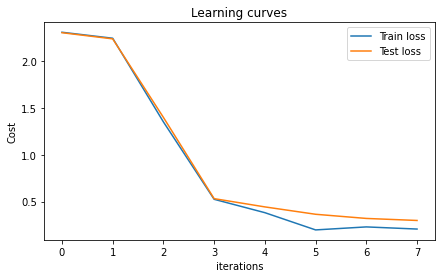

In [ ]:
# Plot the cost
plt.plot(train_costs)
plt.plot(val_costs)
plt.ylabel('Cost')
plt.xlabel('iterations')
plt.title('Learning curves')
plt.legend(['Train loss', 'Test loss'])
plt.show()

### Accuracy vs iterations

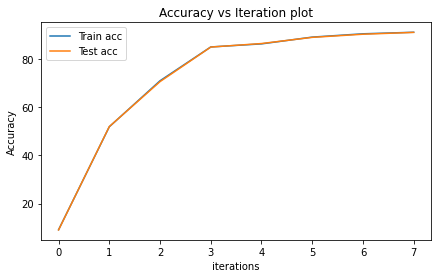

In [ ]:
# Plot the val accuracy
plt.plot(train_acc)
plt.plot(val_acc)
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.title('Accuracy vs Iteration plot')
plt.legend(['Train acc', 'Test acc'])
plt.show()

### Performance on the Test set 

Cost function value: 0.2625685930252075
Accuracy: 0.9227
Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.92      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.96      0.86      0.91       982
           5       0.93      0.87      0.90       892
           6       0.95      0.93      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.87      0.92      0.89       974
           9       0.86      0.91      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Confusion Matrix: 



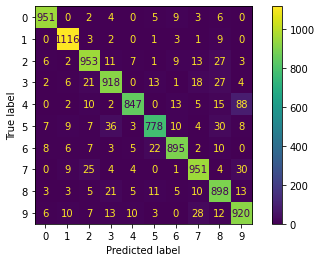

In [ ]:
for images, labels in test_loader:               
  # Forward pass only to get logits/output
  outputs = model(images)
  test_cost = criterion(outputs, labels)
  print("Cost function value: " + str(test_cost.item()))

  # Get predictions from the maximum value
  _, predicted = torch.max(outputs.data, 1)

  print("Accuracy: "  + str(accuracy_score(labels.numpy(), predicted.numpy())))

  print("Classification Report: \n")
  print(classification_report(labels.numpy(), predicted.numpy(), zero_division = 0))

  print("Confusion Matrix: \n")
  cm = confusion_matrix(labels.numpy(), predicted.numpy(), labels = range(10))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = range(10))
  disp.plot()
  plt.show()

### Performance on randomly selected images

In [ ]:
images, labels = iter(test_loader).next()

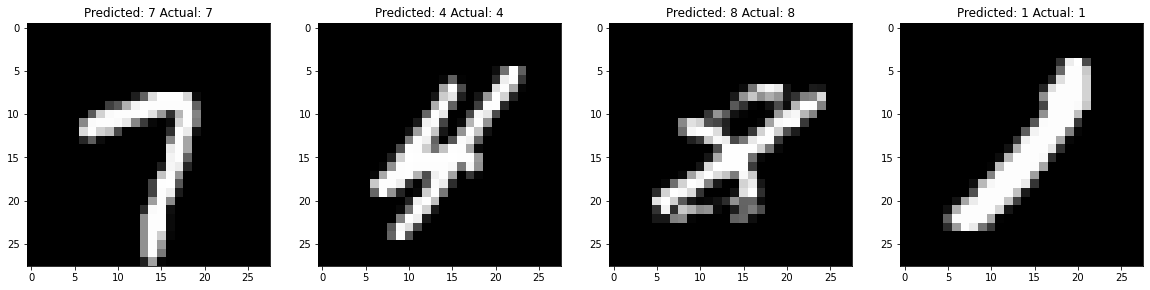

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (20, 20))
for i in range(4):
  idx = random.randint(0, len(mnist_data_test) - 1)
  image = images[idx:idx + 1]
  label = labels[idx]
  _, predicted = torch.max(model(image).data, 1)
  ax[i].imshow(image[0, 0, :, :])
  ax[i].set_title('Predicted: {} Actual: {}'.format(predicted.item(), label.item()))

### Model Summary

In [7]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 32, 14, 14]           9,248
         MaxPool2d-4             [-1, 32, 7, 7]               0
            Linear-5                  [-1, 500]         784,500
            Linear-6                   [-1, 10]           5,010
Total params: 799,078
Trainable params: 799,078
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.30
Params size (MB): 3.05
Estimated Total Size (MB): 3.35
----------------------------------------------------------------


Total number of parameters: 799078 \
Number of parameters in FC layers: 789510 \
Number of parameters in convolution layers: 9568 \
Total number of neurons: 31870\
Number of neurons in FC layers: 510 \
Number of neurons in convolution layers: 31360 \

## MNIST classification using CNN: Batch Normalization

In [8]:
class ModelBatchNorm(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1)
        self.norm1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(32, 32, kernel_size = 3, stride = 1, padding = 1)
        self.norm2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(7 * 7 * 32, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.norm1(self.conv1(x))))
        x = self.pool2(F.relu(self.norm2(self.conv2(x))))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
model = ModelBatchNorm()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
train_costs = []
val_costs = []
train_acc = []
val_acc = []

for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if i % 200 == 0:
            train_costs.append(loss.item())
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            with torch.no_grad():
              for j, data in enumerate(train_loader, 0):
                images, labels = data
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
              accuracy = 100 * correct / total
              train_acc.append(accuracy)
              correct = 0
              total = 0
              for j, data in enumerate(val_loader, 0):
                images, labels = data
                # Forward pass only to get logits/output
                outputs = model(images)
                val_cost = criterion(outputs, labels)
                val_costs.append(val_cost.item())
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
              accuracy = 100 * correct / total
              val_acc.append(accuracy)
              # Print Loss
              print('Epoch: {}. Iteration: {}. Train Loss: {}. Validation Accuracy: {}'.format(epoch, i, loss.item(), accuracy))

print('Finished Training')

Epoch: 0. Iteration: 0. Train Loss: 2.392289638519287. Validation Accuracy: 9.866666793823242
Epoch: 0. Iteration: 200. Train Loss: 0.35344868898391724. Validation Accuracy: 92.79166412353516
Epoch: 0. Iteration: 400. Train Loss: 0.09815708547830582. Validation Accuracy: 95.125
Epoch: 0. Iteration: 600. Train Loss: 0.19912666082382202. Validation Accuracy: 95.9749984741211
Finished Training


### Learning curves

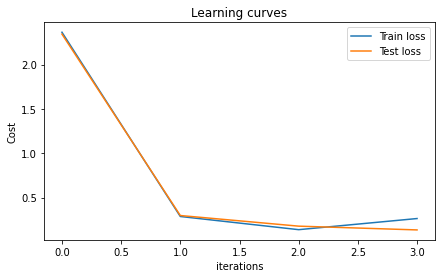

In [ ]:
# Plot the cost
plt.plot(train_costs)
plt.plot(val_costs)
plt.ylabel('Cost')
plt.xlabel('iterations')
plt.title('Learning curves')
plt.legend(['Train loss', 'Test loss'])
plt.show()

### Accuracy vs iterations

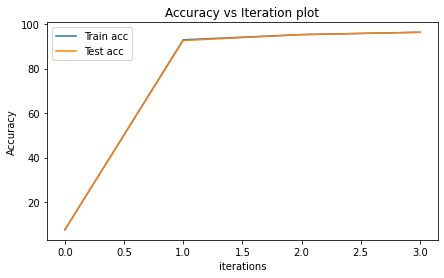

In [ ]:
# Plot the val accuracy
plt.plot(train_acc)
plt.plot(val_acc)
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.title('Accuracy vs Iteration plot')
plt.legend(['Train acc', 'Test acc'])
plt.show()

### Performance on the Test set

Cost function value: 0.10755844414234161
Accuracy: 0.9706
Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.97      0.98       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix: 



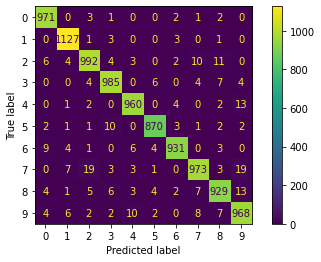

In [ ]:
for images, labels in test_loader:               
  # Forward pass only to get logits/output
  outputs = model(images)
  test_cost = criterion(outputs, labels)
  print("Cost function value: " + str(test_cost.item()))

  # Get predictions from the maximum value
  _, predicted = torch.max(outputs.data, 1)

  print("Accuracy: "  + str(accuracy_score(labels.numpy(), predicted.numpy())))

  print("Classification Report: \n")
  print(classification_report(labels.numpy(), predicted.numpy(), zero_division = 0))

  print("Confusion Matrix: \n")
  cm = confusion_matrix(labels.numpy(), predicted.numpy(), labels = range(10))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = range(10))
  disp.plot()
  plt.show()

### Performance on randomly selected images

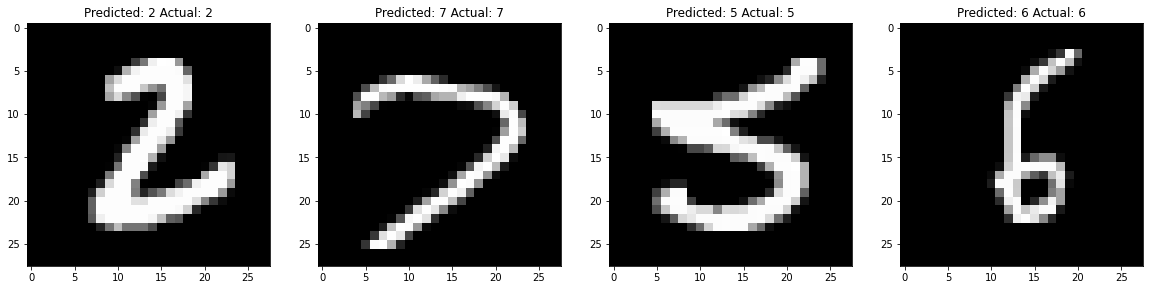

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (20, 20))
for i in range(4):
  idx = random.randint(0, len(mnist_data_test) - 1)
  image = images[idx:idx + 1]
  label = labels[idx]
  _, predicted = torch.max(model(image).data, 1)
  ax[i].imshow(image[0, 0, :, :])
  ax[i].set_title('Predicted: {} Actual: {}'.format(predicted.item(), label.item()))

### Model Summary

In [10]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           9,248
       BatchNorm2d-5           [-1, 32, 14, 14]              64
         MaxPool2d-6             [-1, 32, 7, 7]               0
            Linear-7                  [-1, 500]         784,500
            Linear-8                   [-1, 10]           5,010
Total params: 799,206
Trainable params: 799,206
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.54
Params size (MB): 3.05
Estimated Total Size (MB): 3.59
----------------------------------------------------------------


Batch Normalization improves the accuracy from 92% to 97%. But the training time increases beacuse of learning additional parameters

## Visualizating the CNN

### Convolution layer 1 filters

In [ ]:
filter_1 = model.conv1(images[:1]).detach().numpy()

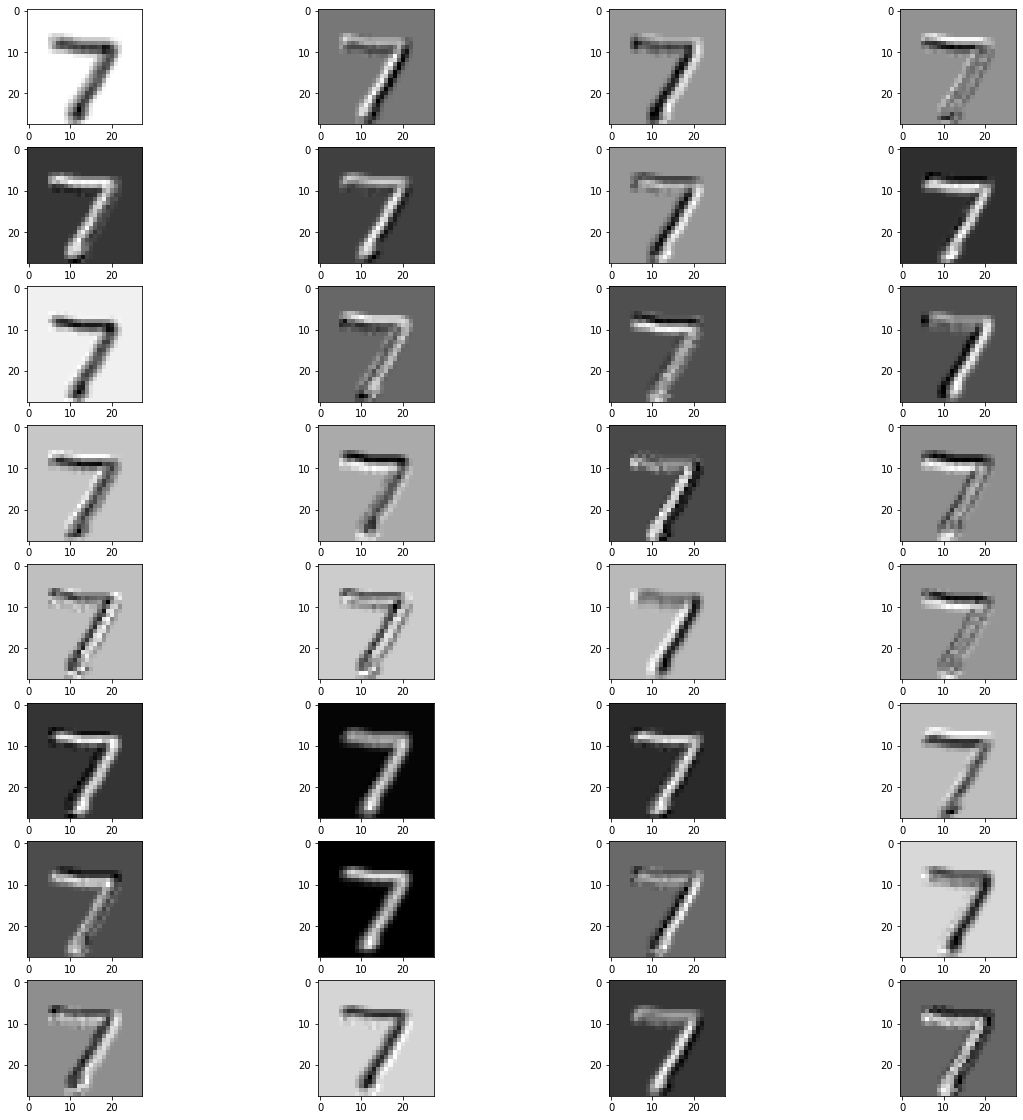

In [ ]:
fig, ax = plt.subplots(8, 4, figsize = (20, 20))
for i in range(filter_1.shape[1]):
  r = i // 4
  c = i % 4
  ax[r, c].imshow(filter_1[0, i, :, :])

We observe that the first layer filters capture simple features like the edges, corners, lines etc. 

### Convolution layer 2 filters

In [ ]:
x = model.pool1(F.relu(model.norm1(model.conv1(images[:1]))))
filter_2 = model.conv2(x).detach().numpy()

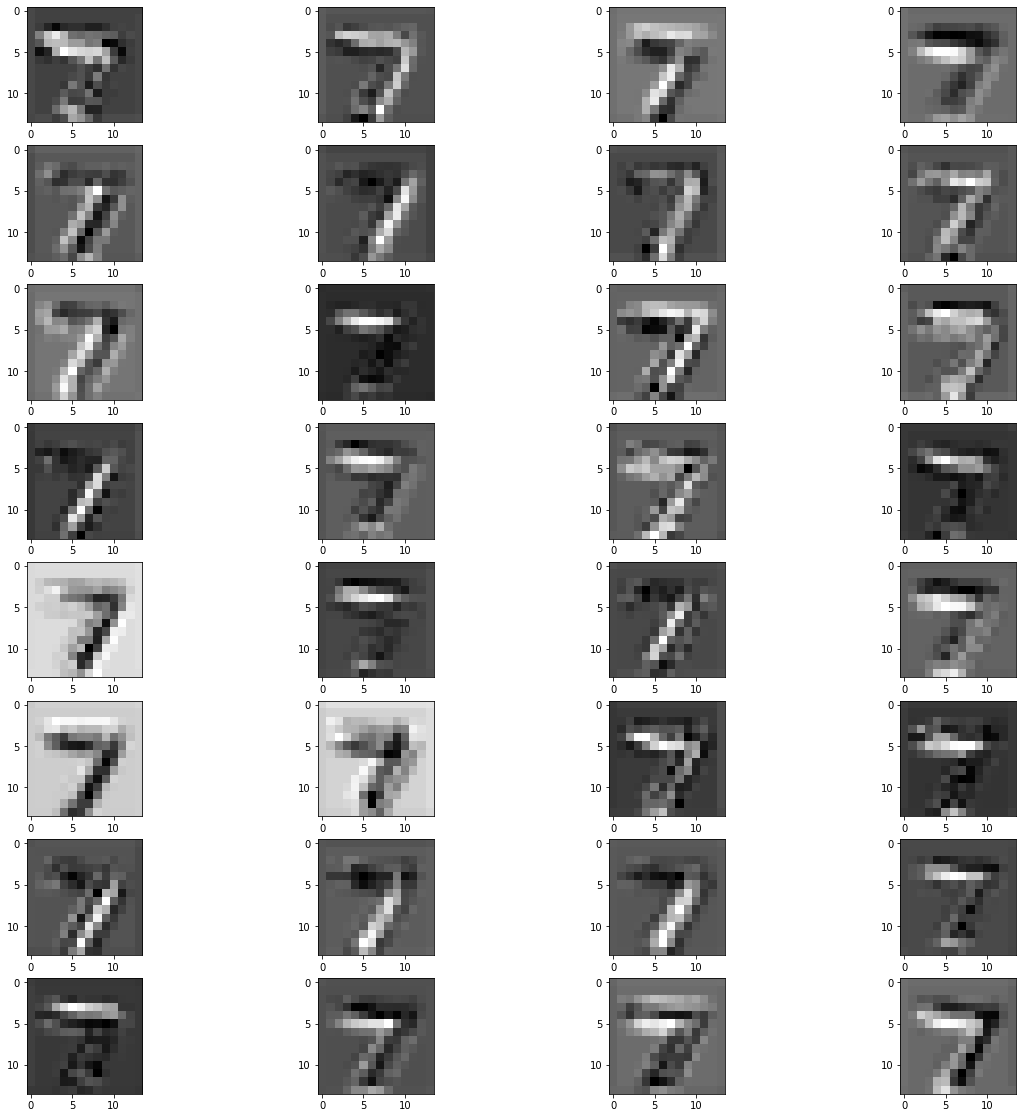

In [ ]:
fig, ax = plt.subplots(8, 4, figsize = (20, 20))
for i in range(filter_2.shape[1]):
  r = i // 4
  c = i % 4
  ax[r, c].imshow(filter_2[0, i, :, :])

Compared to convolution layer 1 filters, convolution layer 2 filters seem more abstract as they capture higher order features that are more complex

### Convolution layer 1 activations

In [ ]:
activ_1 = F.relu(model.norm1(model.conv1(images[:1]))).detach().numpy()

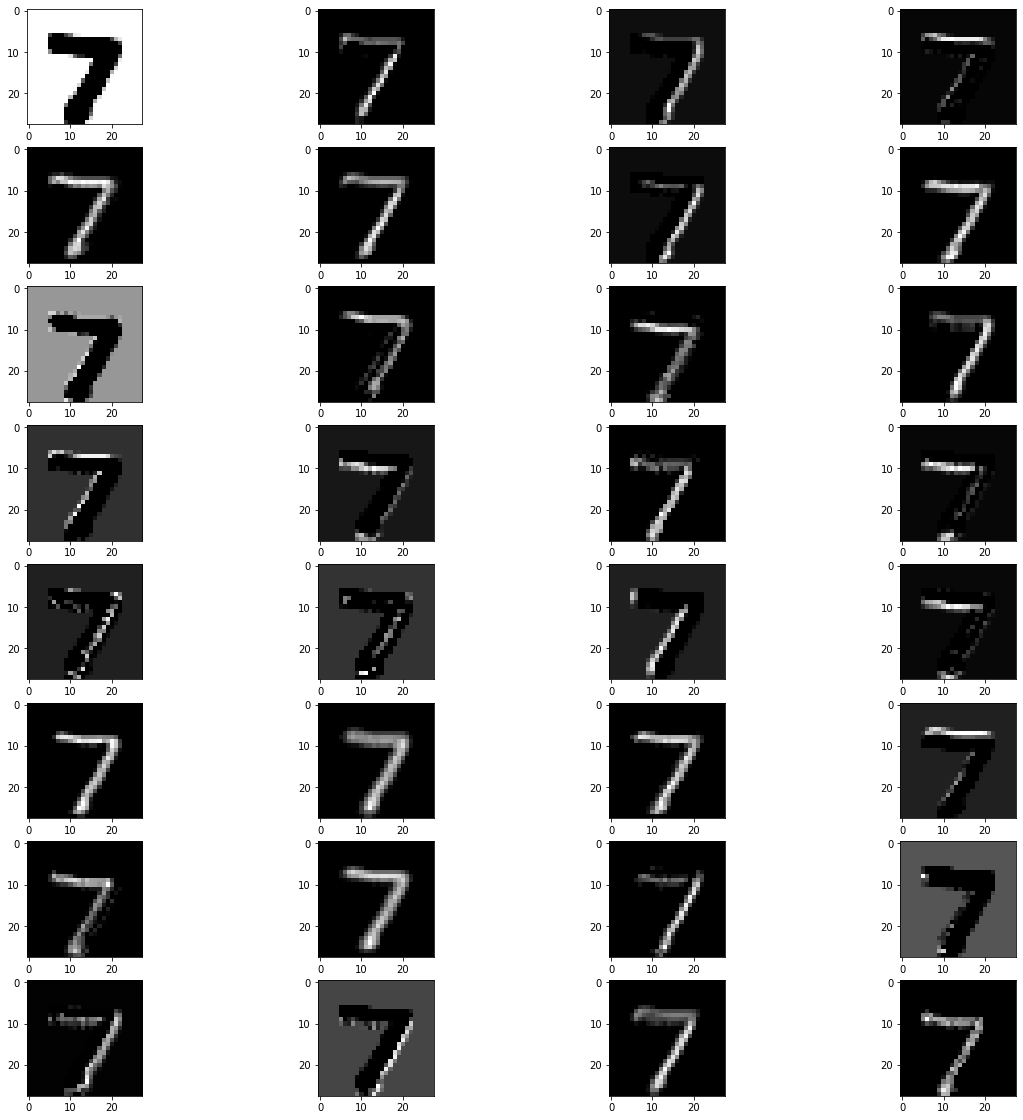

In [ ]:
fig, ax = plt.subplots(8, 4, figsize = (20, 20))
for i in range(activ_1.shape[1]):
  r = i // 4
  c = i % 4
  ax[r, c].imshow(activ_1[0, i, :, :])

### Convolution layer 2 activations

In [ ]:
x = model.pool1(F.relu(model.norm1(model.conv1(images[:1]))))
activ_2 = F.relu(model.norm2(model.conv2(x))).detach().numpy()

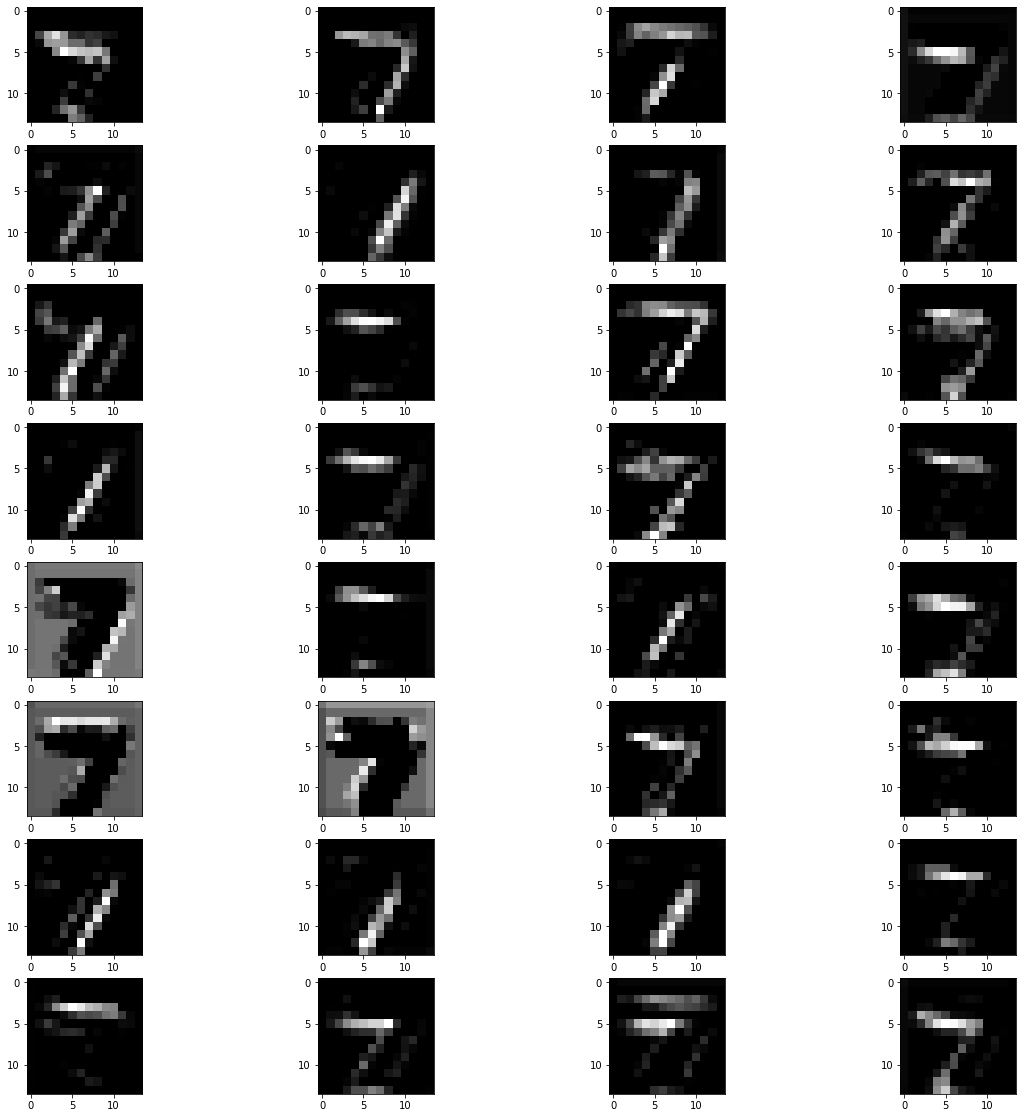

In [ ]:
fig, ax = plt.subplots(8, 4, figsize = (20, 20))
for i in range(activ_2.shape[1]):
  r = i // 4
  c = i % 4
  ax[r, c].imshow(activ_2[0, i, :, :])

From the activations, we can see that the network learns complex and abstract patterns as we go deeper

### Occlusion experiment

In [ ]:
#@title

def occlusion(model, image, label, occ_size = 5, occ_stride = 1, occ_pixel = 0.5):
  
    #get the width and height of the image
    width, height = image.shape[-2], image.shape[-1]
  
    #setting the output image width and height
    output_height = int(np.ceil((height-occ_size)/occ_stride))
    output_width = int(np.ceil((width-occ_size)/occ_stride))
  
    #create a white image of sizes we defined
    heatmap = torch.zeros((output_height, output_width))
    
    #iterate all the pixels in each column
    for h in range(0, height):
        for w in range(0, width):
            
            h_start = h*occ_stride
            w_start = w*occ_stride
            h_end = min(height, h_start + occ_size)
            w_end = min(width, w_start + occ_size)
            
            if (w_end) >= width or (h_end) >= height:
                continue
            
            input_image = image.clone().detach()
            
            #replacing all the pixel information in the image with occ_pixel(grey) in the specified location
            input_image[:, :, w_start:w_end, h_start:h_end] = occ_pixel
            
            #run inference on modified image
            output = model(input_image)
            output = nn.functional.softmax(output, dim=1)
            prob = output.tolist()[0][label]
            
            #setting the heatmap location to probability value
            heatmap[h, w] = prob 

    return heatmap

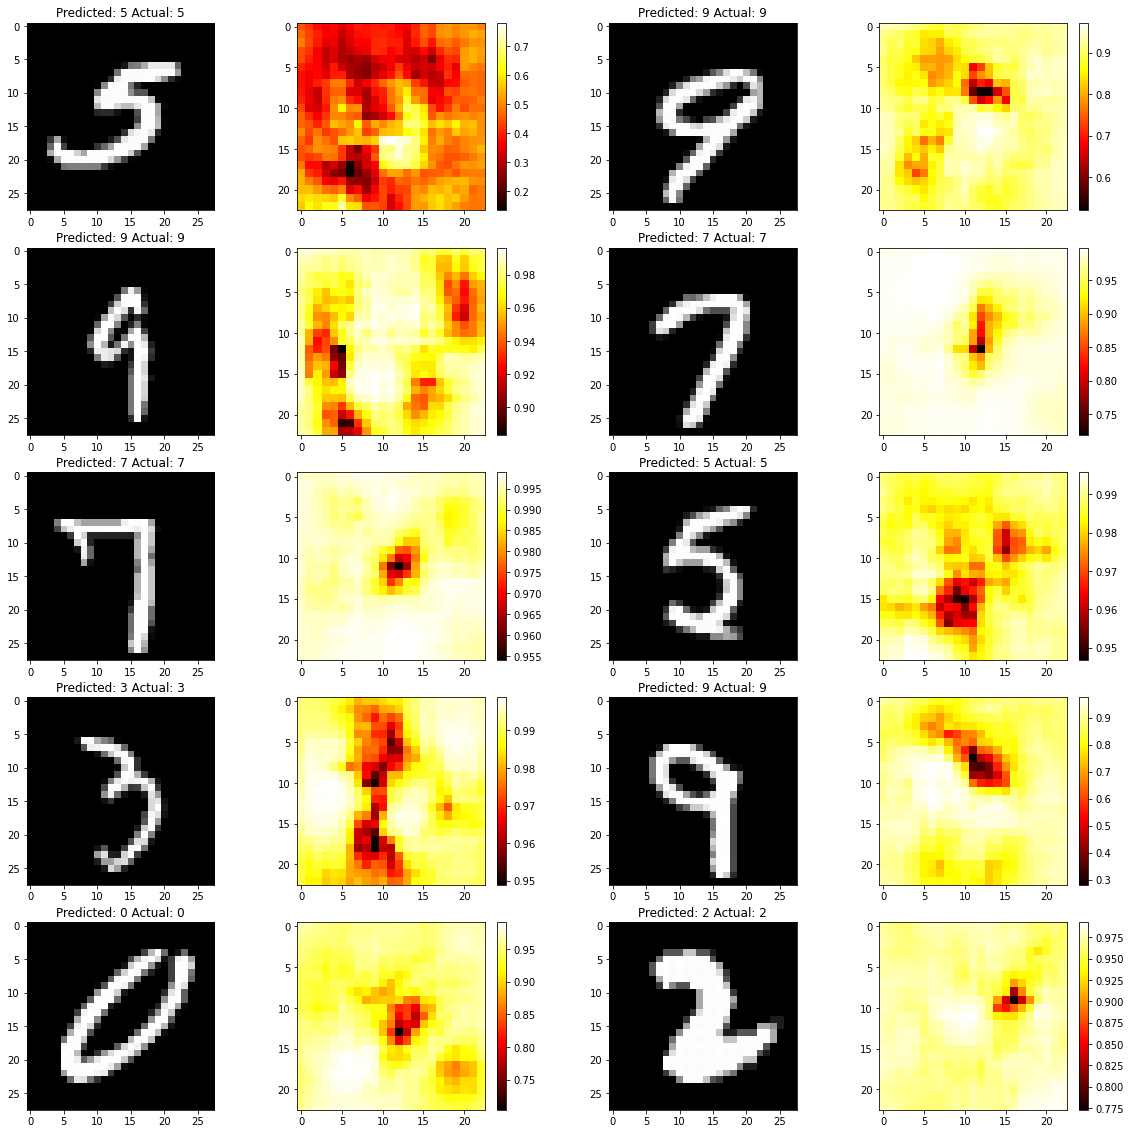

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2) 
  idx = random.randint(0, len(mnist_data_test) - 1)
  image = images[idx:idx + 1]
  label = labels[idx]
  _, predicted = torch.max(model(image).data, 1)
  heatmap = occlusion(model, image, label.item(), occ_size = 5)
  ax[r, c].imshow(image[0, 0, :, :])
  hm = ax[r, c + 1].imshow(heatmap, cmap = 'hot', interpolation = 'nearest')
  ax[r, c].set_title('Predicted: {} Actual: {}'.format(predicted.item(), label.item()))
  plt.colorbar(hm, ax = ax[r, c + 1])

From the heatmaps, we can see that the probability of the ground-truth class decreases when the patch occludes the central portion of the number. On the other hand, the probability of the ground-truth class remains the same when the patch is in the background. From this, we conclude that the shape of the number is important for the network to make accurate predictions. Thus, the learning is meaningful

## Adversarial Examples

### Non-targeted attack
### Learning curve

In [ ]:
X = torch.tensor(128.0 + torch.randn(1, 1, 28, 28), requires_grad = True)
eta = 50

In [ ]:
costs = []
for _ in range(10000):
  output = model(X)
  costs.append(output[0, 0])
  output[0, 0].backward()
  grad = X.grad
  X.data = X.data + eta * grad
  X.grad.data.zero_()
  # plt.imshow(X[0, 0, :, :].detach().numpy())

Text(0.5, 1.0, 'Learning curve')

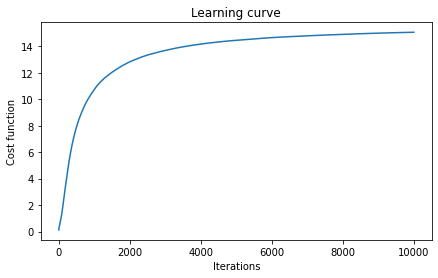

In [ ]:
plt.plot([cost.item() for cost in costs])
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Learning curve')

The cost function is increasing!

### Generated images for each class

In [ ]:
adv_imgs = []
for i in range(10):
  X = torch.tensor(128.0 + torch.randn(1, 1, 28, 28), requires_grad = True)
  for _ in range(10000):
    output = model(X)
    output[0, i].backward()
    grad = X.grad
    X.data = X.data + eta * grad
    X.grad.data.zero_()
    # plt.imshow(X[0, 0, :, :].detach().numpy())
  _, pred = torch.max(model(X).data, 1)
  adv_imgs.append((X[0, 0, :, :].detach().numpy(), pred))

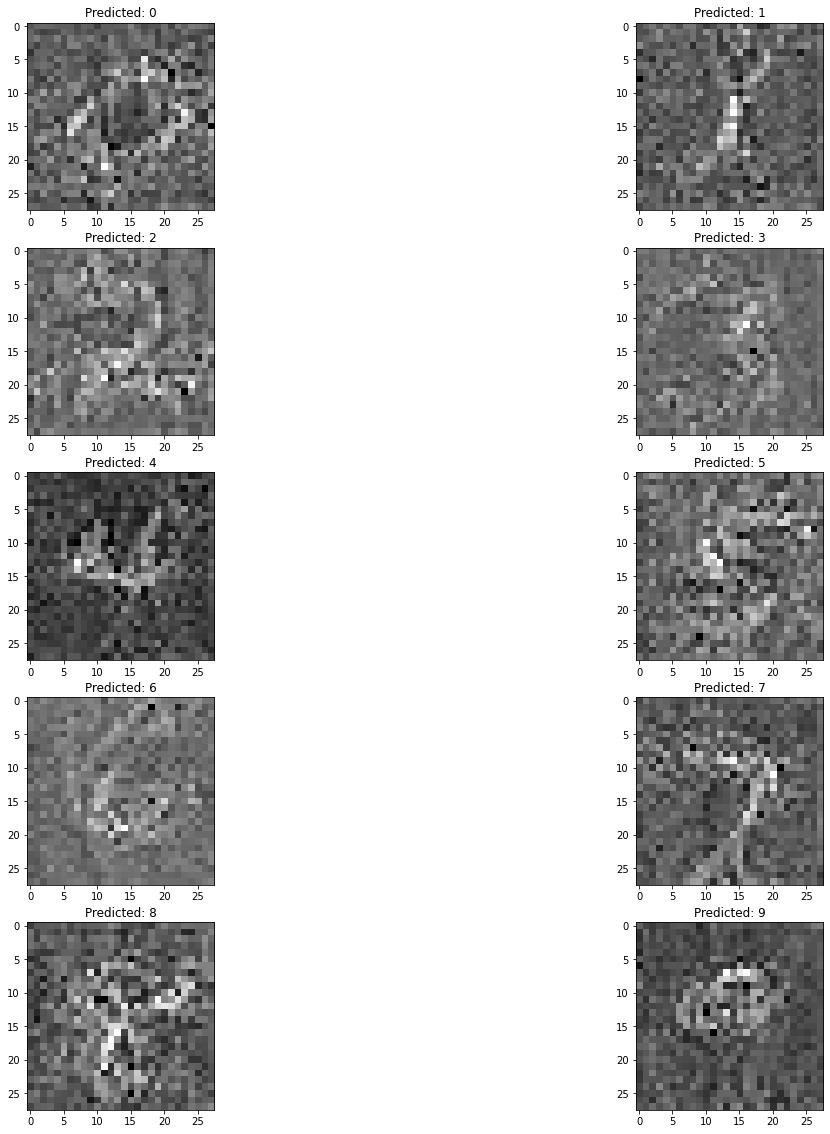

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = i % 2
  ax[r, c].imshow(adv_imgs[i][0])
  ax[r, c].set_title('Predicted: {}'.format(adv_imgs[i][-1].item()))

The network always predicts the target class with high confidence. The generated images do not look like a number. This might be because of the absence of an image prior in the objective function 

### Targeted attack
### Generated images for each class

In [ ]:
eta = 1
beta = 0.25 # 0.2

In [ ]:
adv_imgs = []
for i in range(10):
  X = torch.tensor(128.0 + torch.randn(1, 1, 28, 28), requires_grad = True)
  for _ in range(10000):
    output = model(X)
    (output[0, i] - beta * ((X - images[:1])**2).sum()).backward()
    grad = X.grad
    X.data = X.data + eta * grad
    X.grad.data.zero_()
    # plt.imshow(X[0, 0, :, :].detach().numpy())
  _, pred = torch.max(model(X).data, 1)
  adv_imgs.append((X[0, 0, :, :].detach().numpy(), pred))

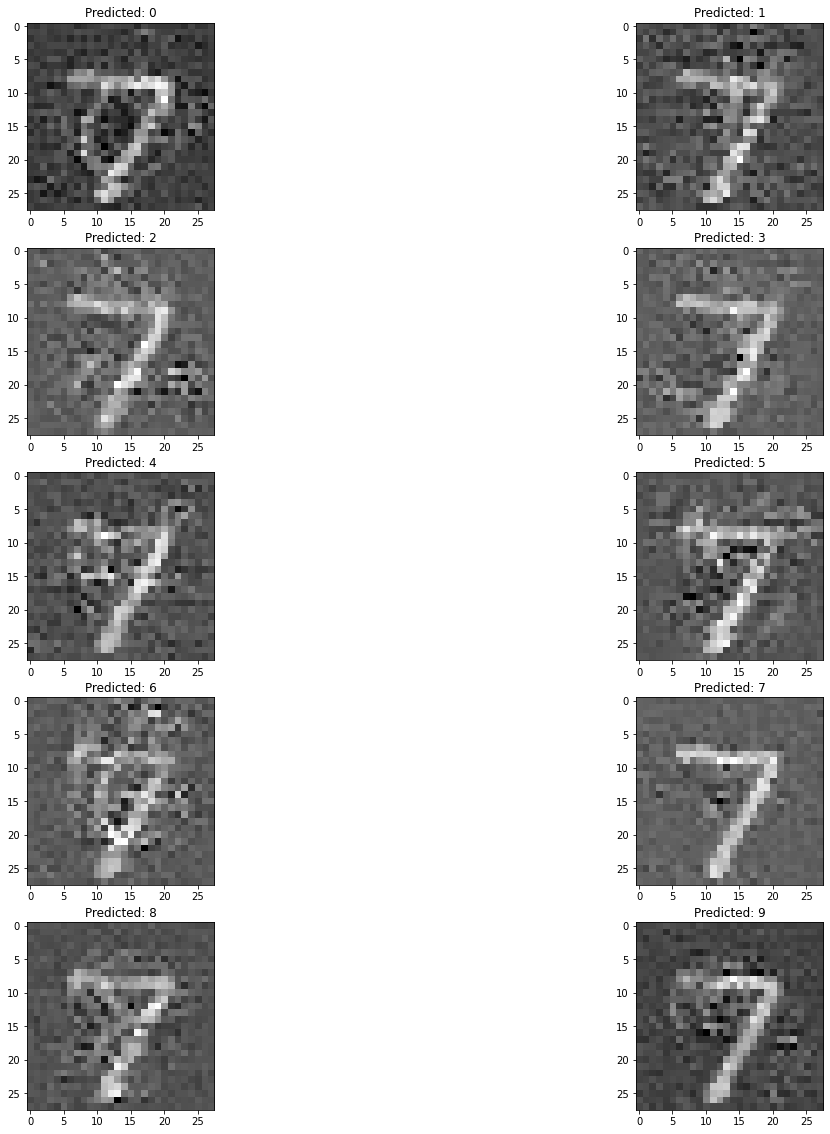

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = i % 2
  ax[r, c].imshow(adv_imgs[i][0])
  ax[r, c].set_title('Predicted: {}'.format(adv_imgs[i][-1].item()))

The generated images look like a number because of the presence of an image prior in the objective function

### Adding Noise
### Generated images and noise for each class

In [ ]:
eta = 1
beta = 0.25

In [ ]:
adv_imgs = []
for i in range(10):
  N = torch.randn((1, 1, 28, 28), requires_grad = True)
  for _ in range(10000):
    output = model(images[:1] + N)
    (output[0, i] - beta * ((N ** 2).sum())).backward()
    grad = N.grad
    N.data = N.data + eta * grad
    N.grad.data.zero_()
    # plt.imshow((images[3:4] + N)[0, 0, :, :].detach().numpy())
  _, pred = torch.max(model(images[:1] + N).data, 1)
  adv_imgs.append(((images[:1] + N)[0, 0, :, :].detach().numpy(), N[0, 0, :, :].detach().numpy(), pred))

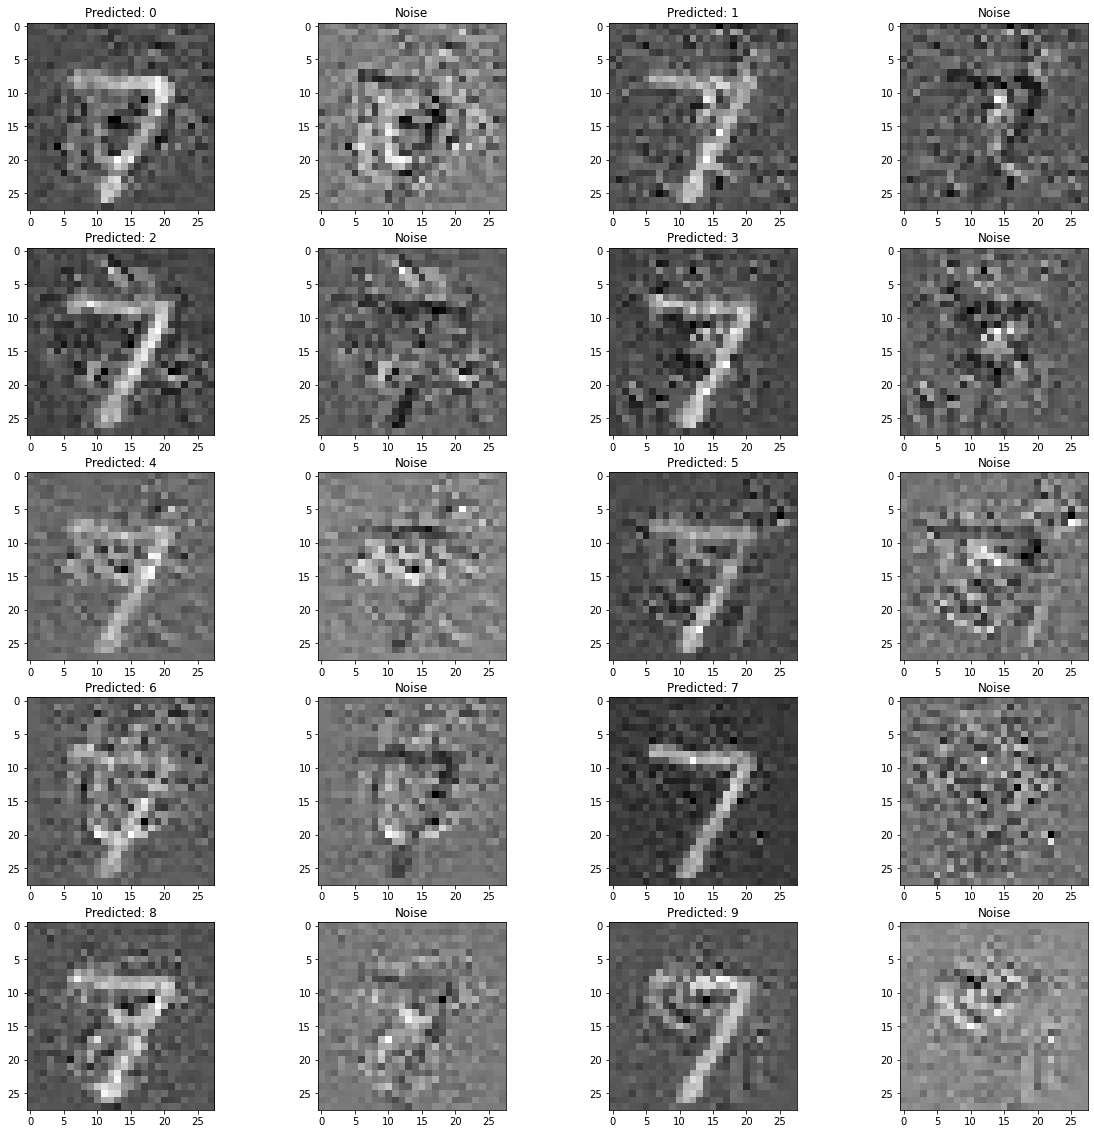

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2) 
  image = adv_imgs[i][0]
  N = adv_imgs[i][1]
  pred = adv_imgs[i][-1]
  ax[r, c].imshow(image)
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

### Effect of adding noise

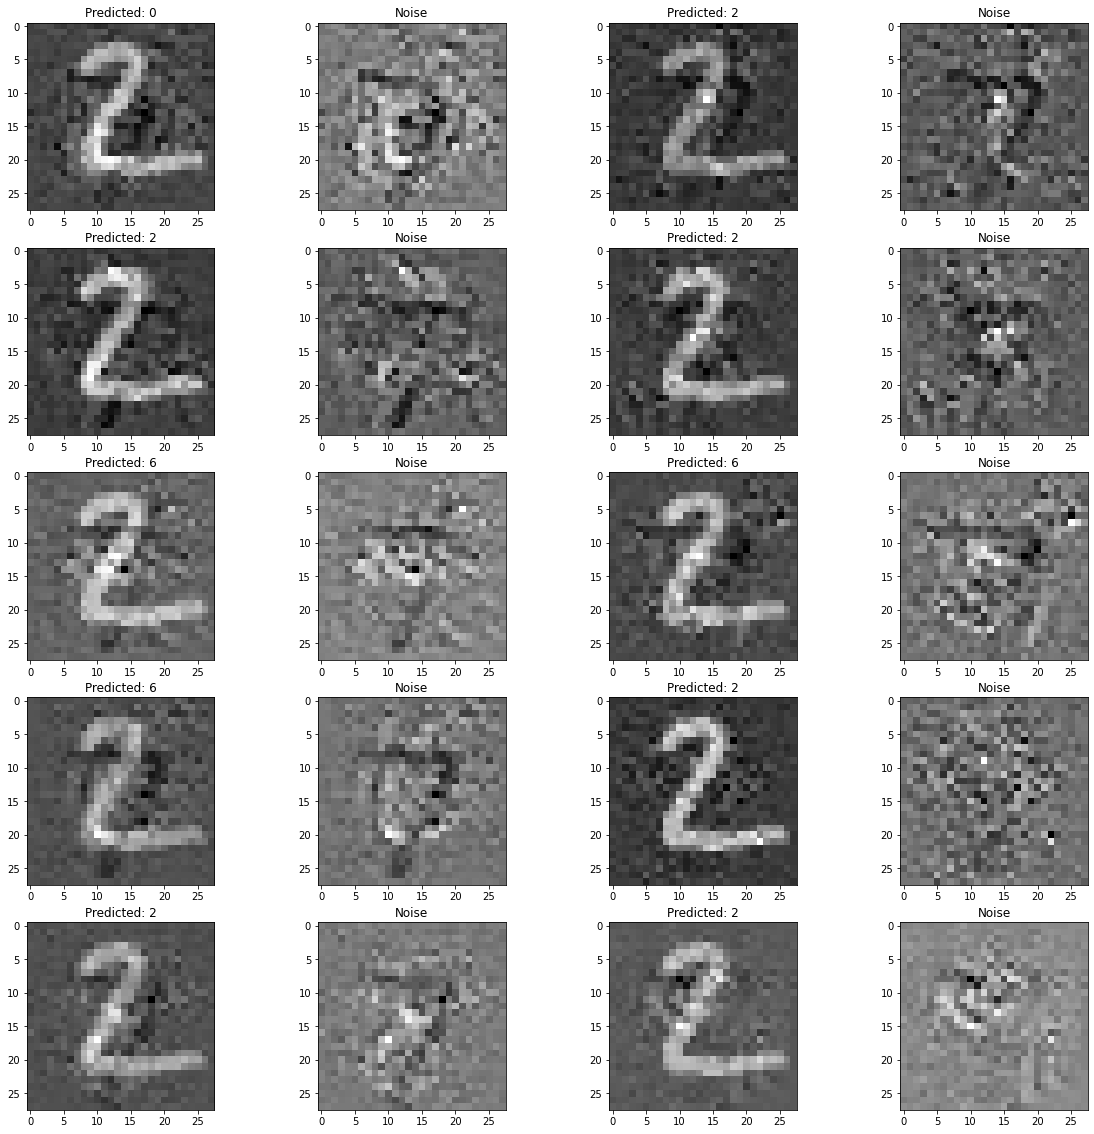

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[1:2] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

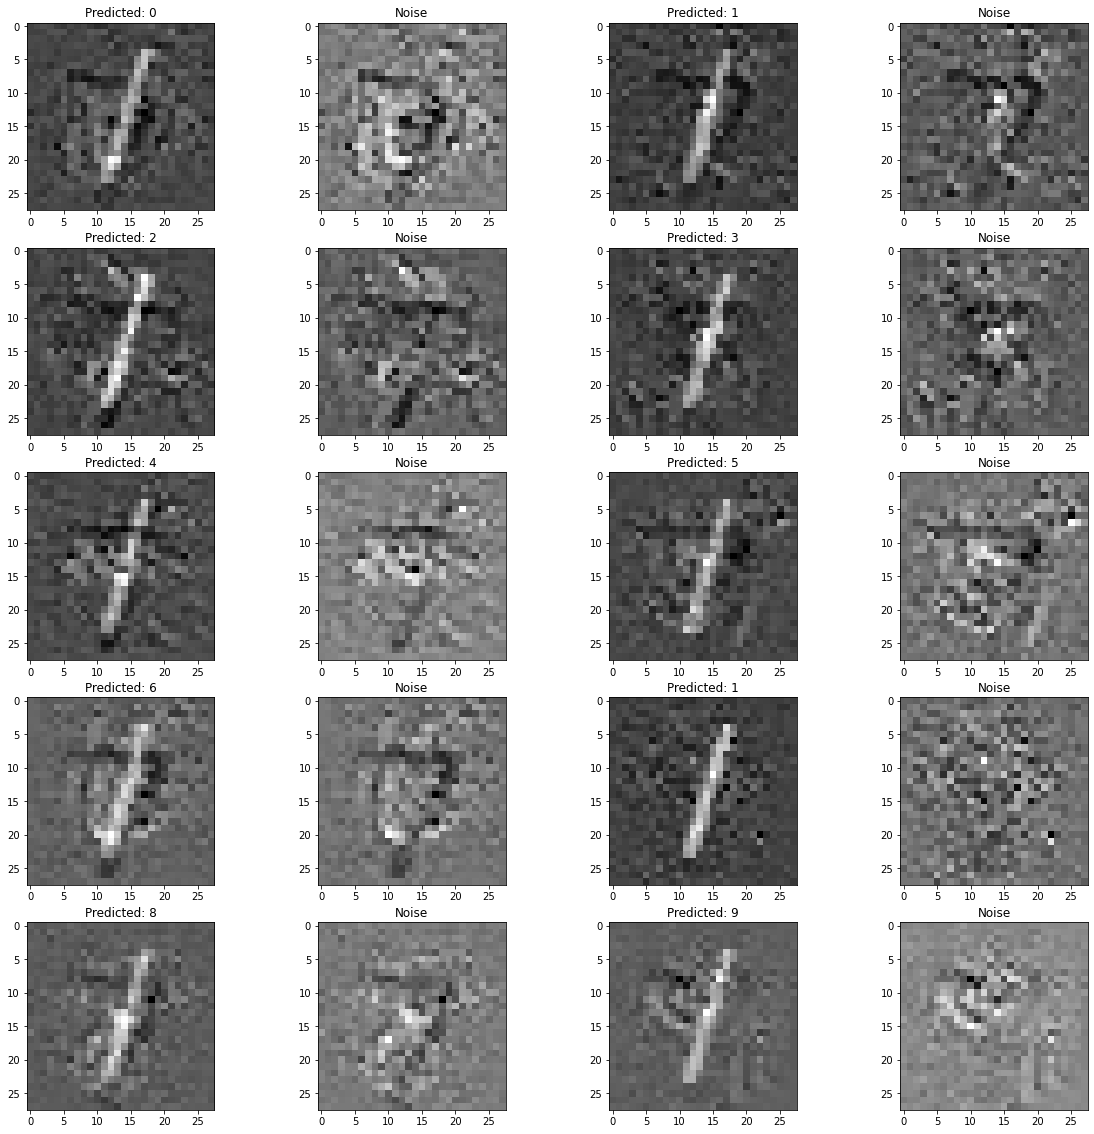

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[2:3] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

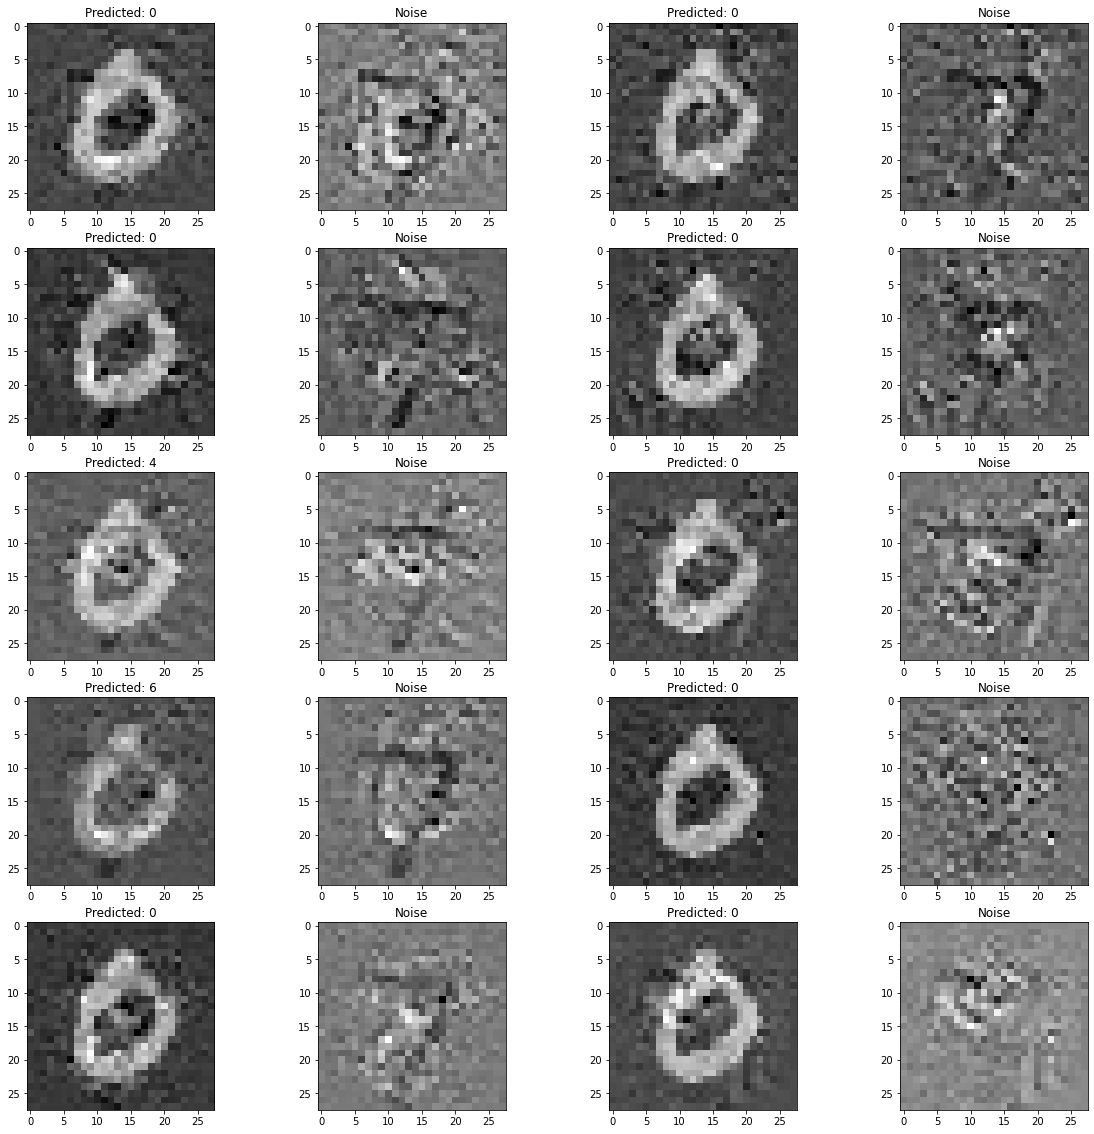

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[3:4] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

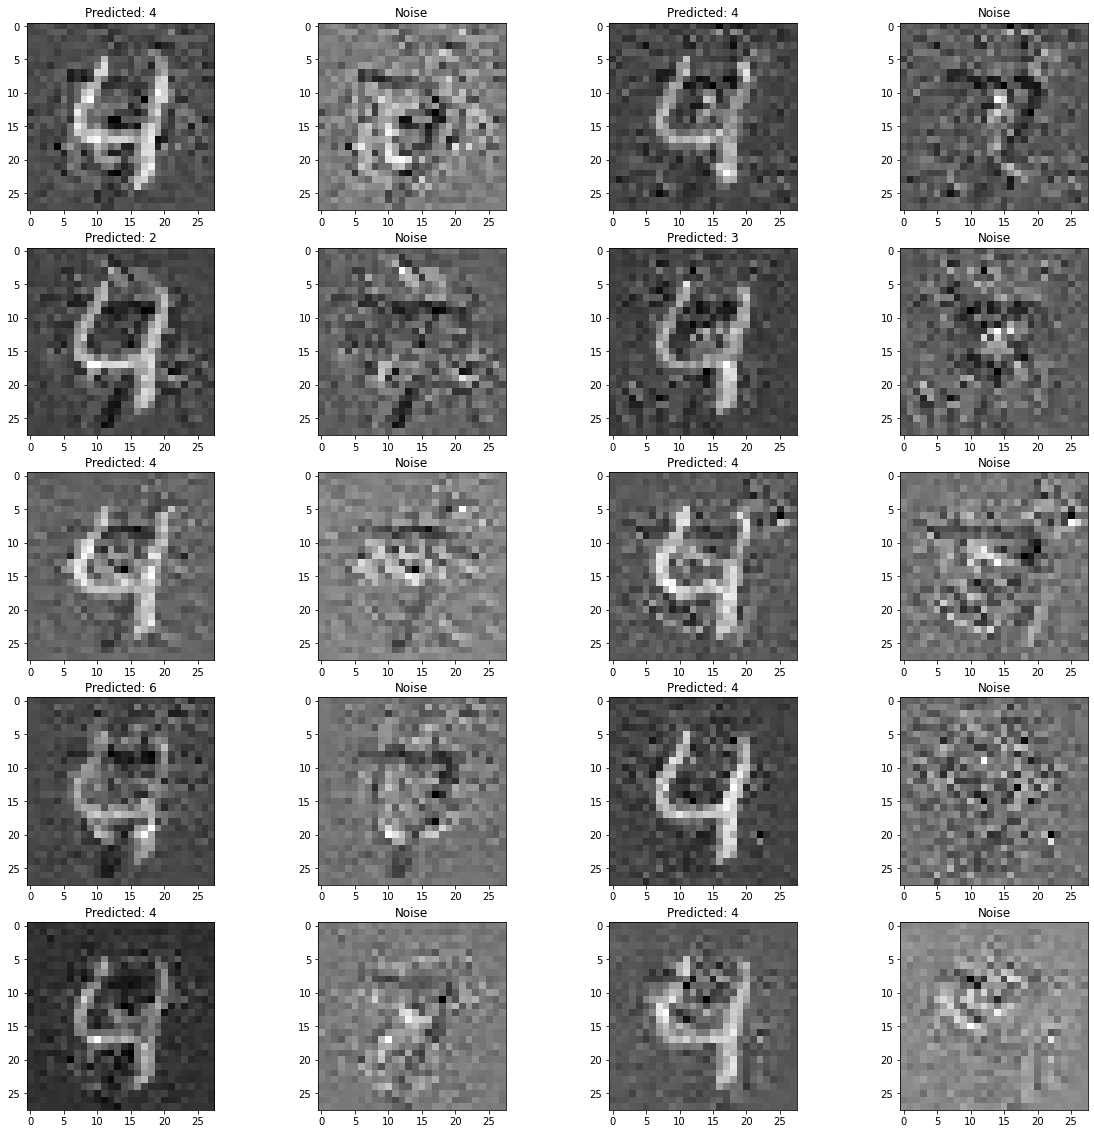

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[4:5] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

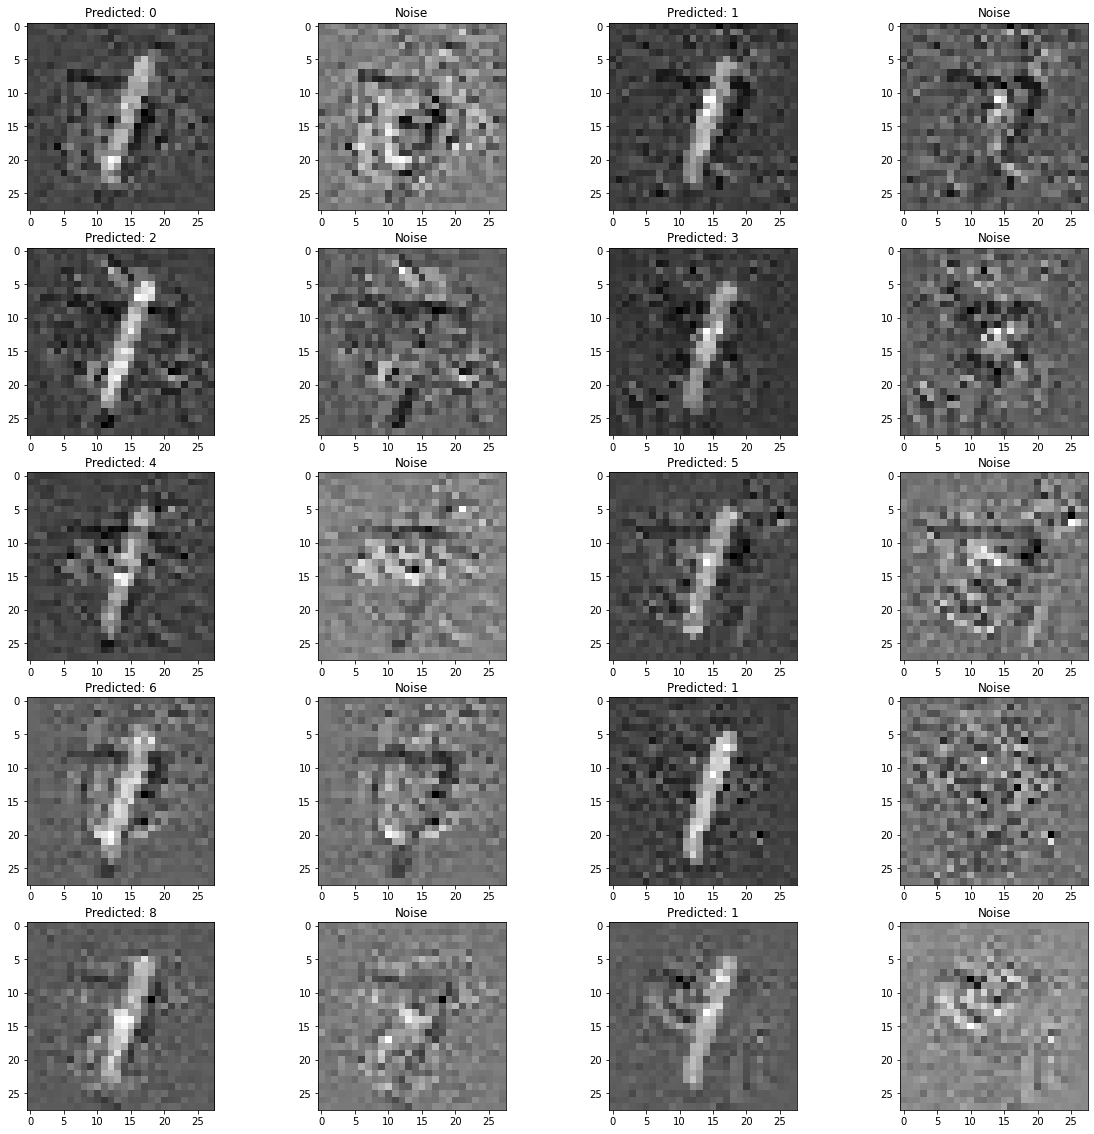

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[5:6] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

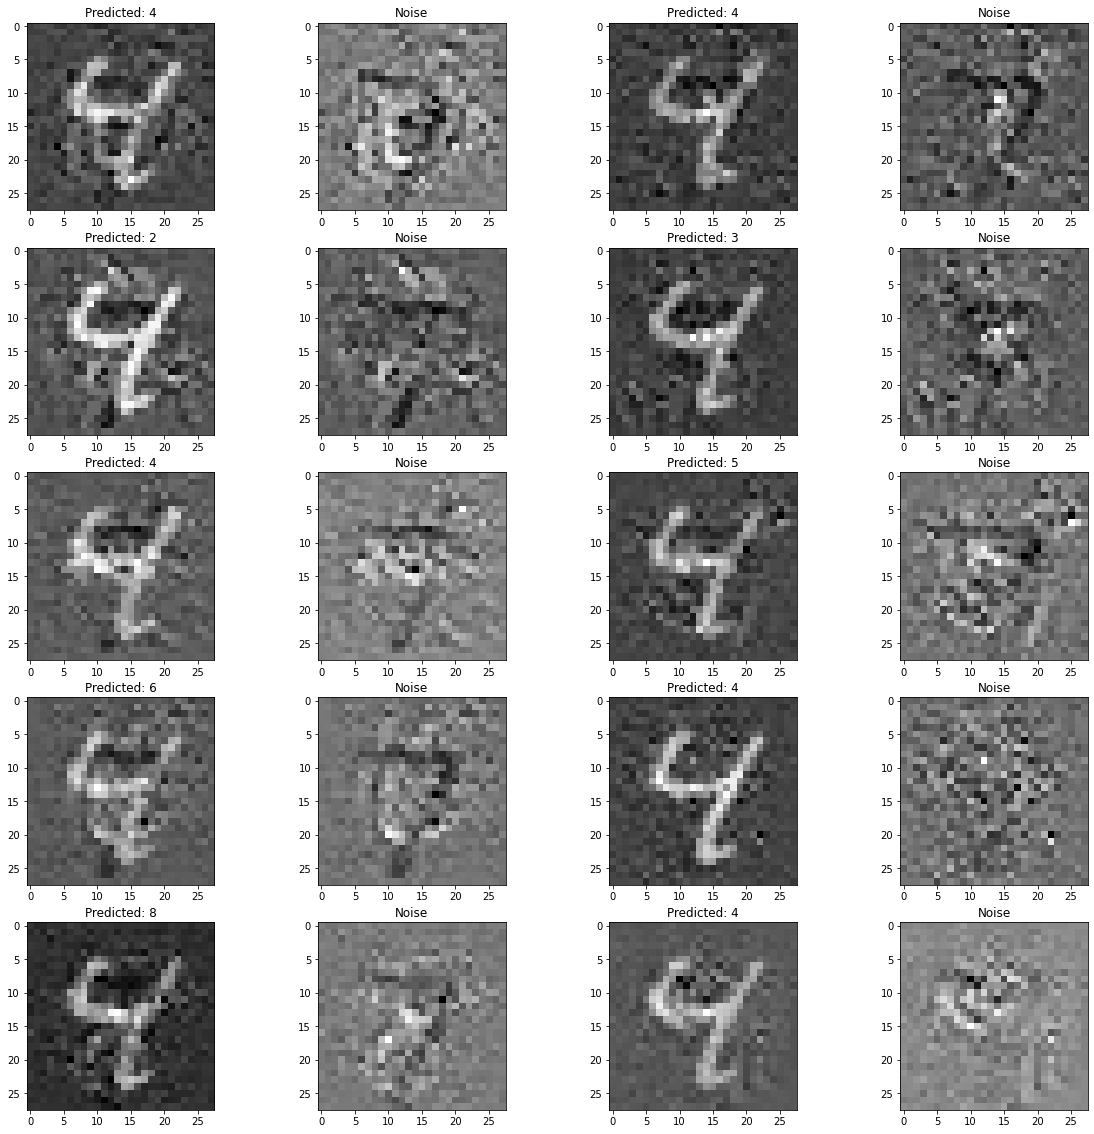

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[6:7] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

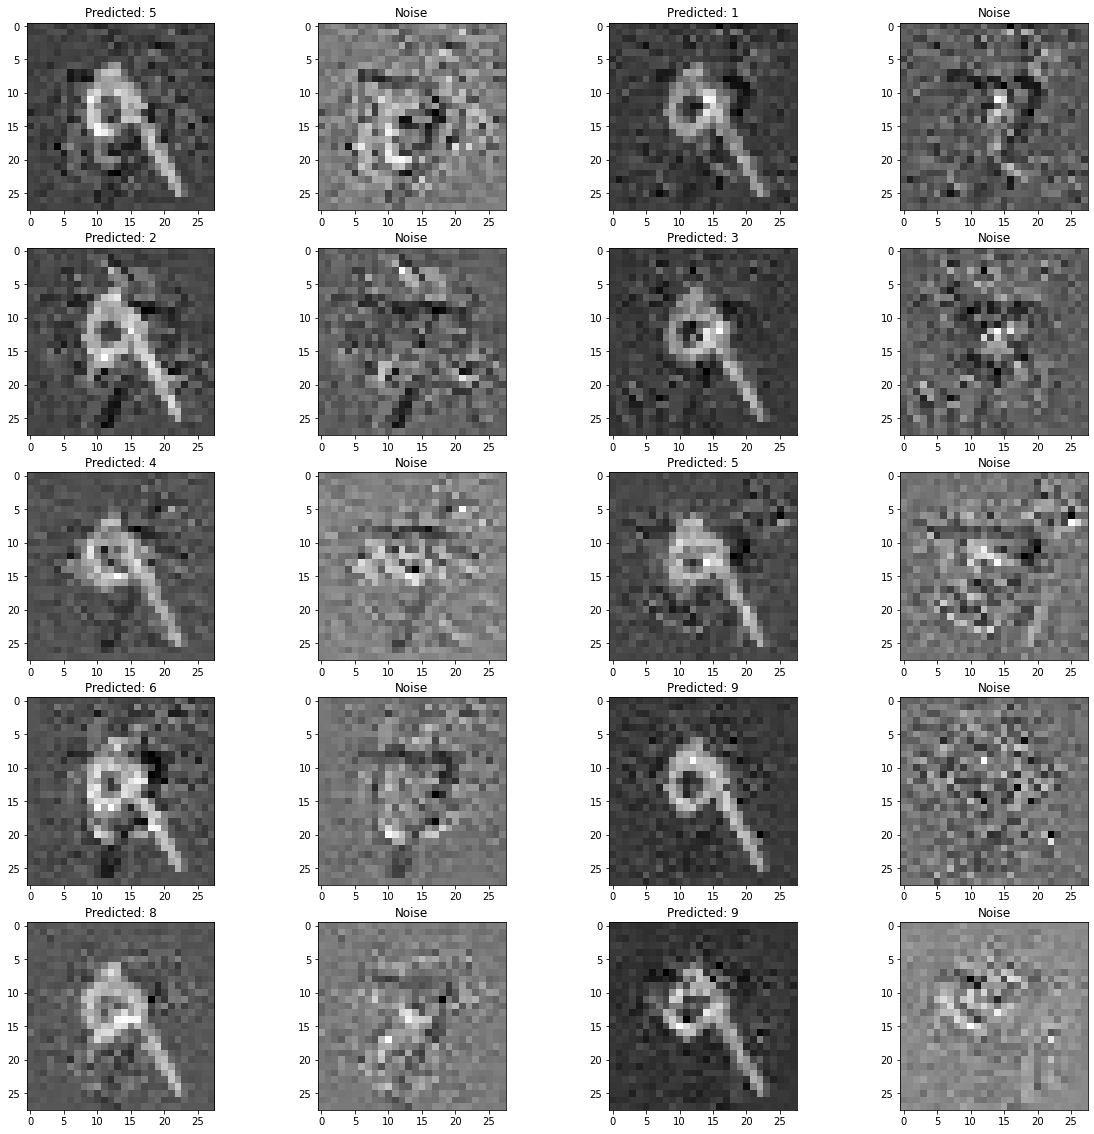

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[7:8] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

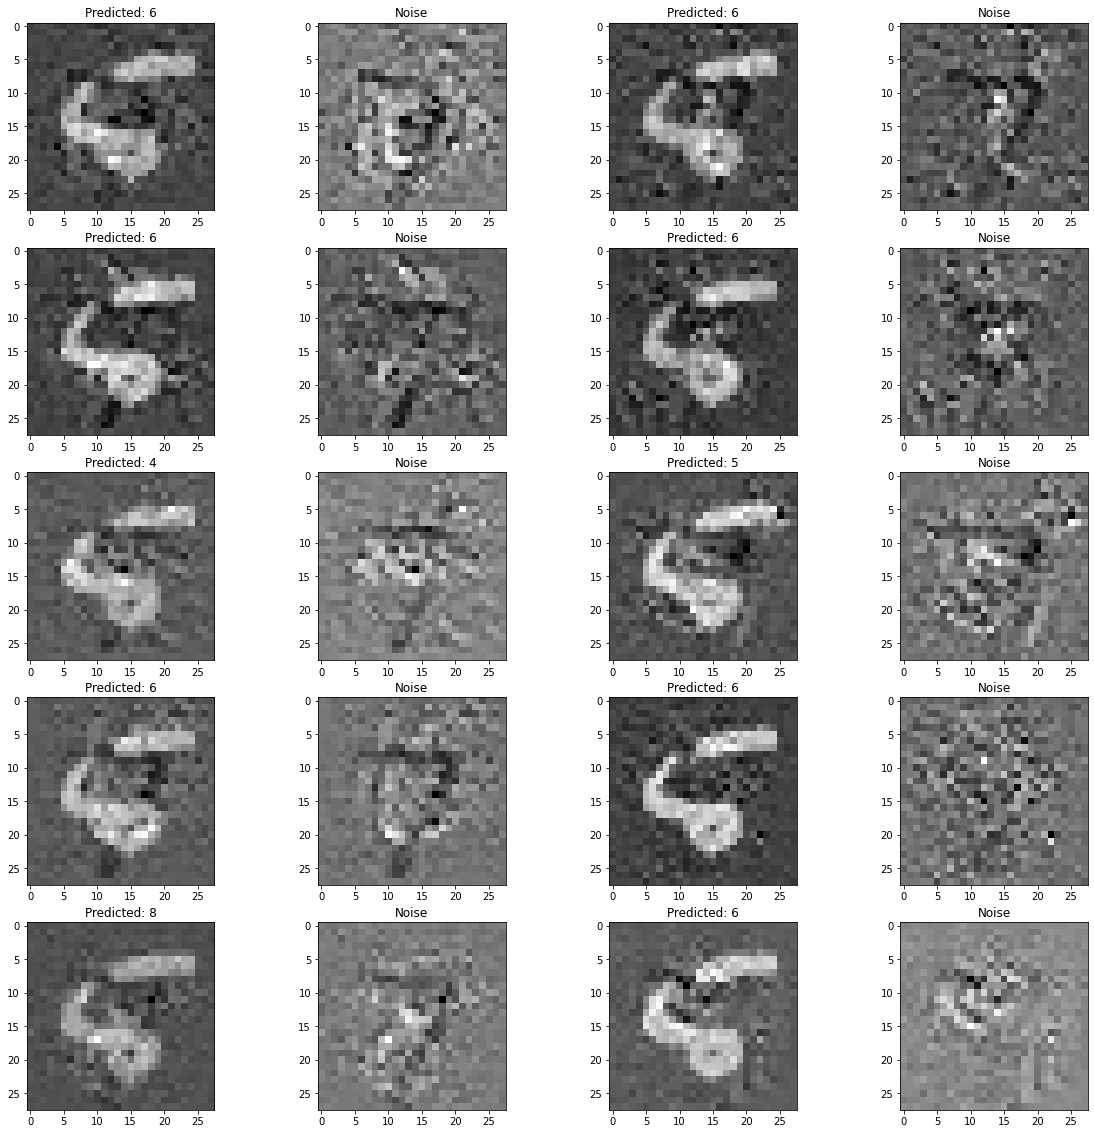

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[8:9] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

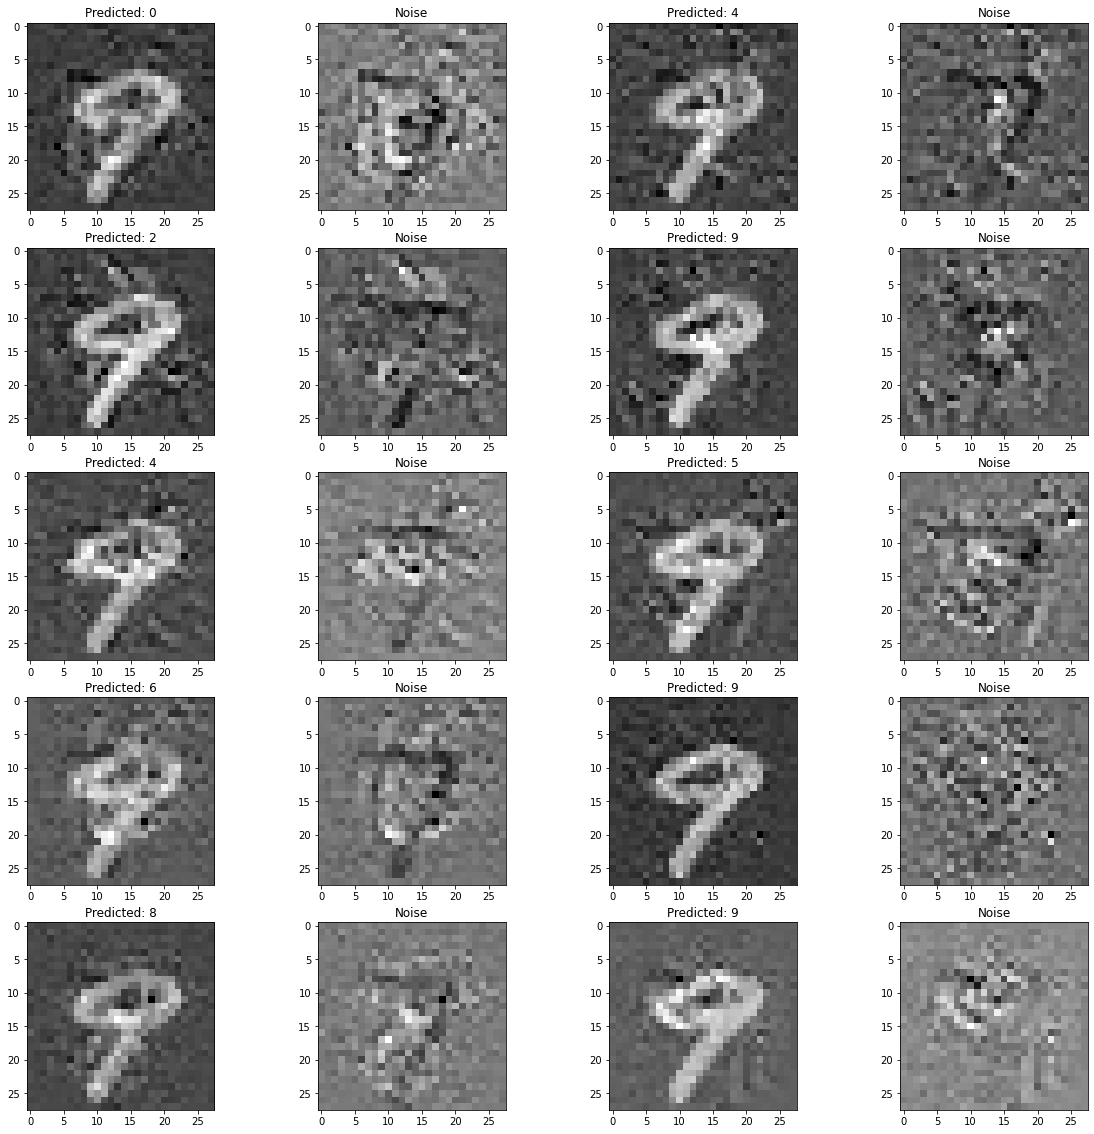

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[9:10] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')

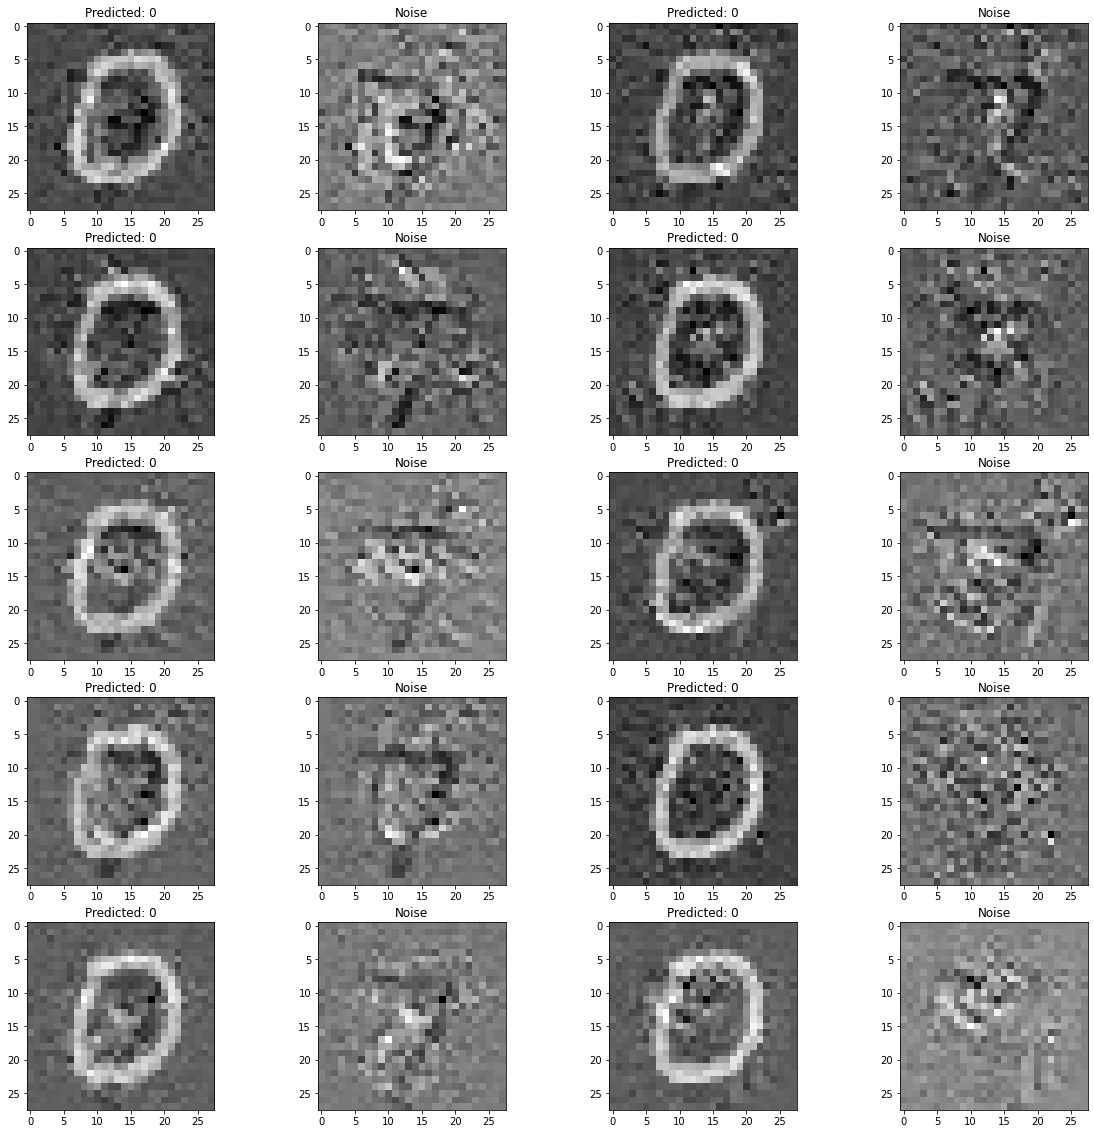

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))
for i in range(10):
  r = i // 2
  c = 2 * (i % 2)
  N = adv_imgs[i][1] 
  image = images[10:11] + torch.tensor(N).reshape(1, 1, 28, 28)
  pred = adv_imgs[i][-1]
  _, pred = torch.max(model(image).data, 1)
  ax[r, c].imshow(image[0, 0, :, :].detach().numpy())
  ax[r, c + 1].imshow(N)
  ax[r, c].set_title('Predicted: {}'.format(pred.item()))
  ax[r, c + 1].set_title('Noise')